In [318]:
import numpy as np
import pandas as pd

import os,os.path,sys

from tika import parser

import re

import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
sns.set(color_codes=True)

In [40]:
def extractPDF(path):
    
    file_data=parser.from_file(path)
    text=file_data['content']
    data_hora=(text.split('[')[1].split(']')[0]).split()
    hora=data_hora[1]
    data=data_hora[0].split('-')
    
    ret=text.split('Sessão de:')[1].split('DOS DEPUTADOS')[0]
    retirar='Sessão de:'+ret+'DOS DEPUTADOS'
    text=text.replace(retirar,'')
    
    dados=[]
    dados.append(data)
    dados.append(hora)
    dados.append(text)
    
    return dados

In [2]:
path=r'C:\Users\Felipe\Documents\GitHub\IntroDS-Projeto-Final\Data2'
file='2019_7_12_Sessão_Extraordinária__0931.pdf'
filename=os.path.join(path,file)


In [41]:
texto_1=extractPDF(filename)

In [230]:
def sessao_dict(texto_lista):
    data=texto_lista[0]
    hora=texto_lista[1]
    
    deputados={}
    erro=[]
    temp=texto_lista[2].split('SR.')
    
    for i in range(0,len(temp)):
        
        nome_dep=teste[i].split('(')[0].replace('.','').strip()
        
        try:
            deputados[nome_dep].append([teste[i].split(') ')[1],i])
        
        except:
            try:
                deputados[nome_dep]=list([[teste[i].split(') ')[1],i]])
            except:
                erro.append(i)
    
    return deputados,erro
    
    
    

In [231]:
dep,e=sessao_dict(texto_1)

In [289]:
len(dep)

132

In [264]:
g=dep.get('A PROFESSORA DORINHA SEABRA REZENDE')

In [432]:
def hist_dis(dicionario,*lista_congressistas):
    
    try:
        
        Deputados=lista_congressistas
    
        Contagem=[]
        for nome in Deputados:
            
            parlamentar=dicionario.get(nome)
            temp={}
            for i in parlamentar:
                
                tamanho=len(i[0])
                Contagem.append([tamanho,i[1],nome])
                
                
        max_t=0
        for i in dicionario:
            dis=dicionario.get(i)
            max_i=0
            for j in range(len(dis)):
                temp=dis[j][1]
                if temp>max_i:
                    max_i=temp
            if max_i>max_t:
                max_t=max_i
        
        print(max_t)
        x=np.zeros(max_t)
        labels=list(np.zeros(max_t))
       
        for k in Contagem:
            x[k[1]]=k[0]
            labels[k[1]]=k[2]
            
        plt.figure(figsize=(24,16))
        sns.distplot(list(dict.keys()),hist_kws={'weights':list(dict.values())},bins=bins2-0.5,kde=False,hist=True)
        
    except:
        
        Contagem=[]
        for nome in dicionario.keys():
        
            parlamentar=dicionario.get(nome)
            for i in parlamentar:
                tamanho=len(i[0])
                Contagem.append([tamanho,i[1],nome])
                
        max_t=0
        for i in dicionario:
            dis=dicionario.get(i)
            max_i=0
            for j in range(len(dis)):
                temp=dis[j][1]
                if temp>max_i:
                    max_i=temp
            if max_i>max_t:
                max_t=max_i
        
        x=np.zeros(max_t)
        
        print('Erro')
        #for k in Contagem:
        #    x[k[1]]=k[0]
        #xd=pd.DataFrame(x)
        #sns.distplot(xd,kde=False)
        
    return Contagem,labels

In [572]:
def hist_dis2(dicionario,*lista_congressistas):
    
    plt.figure(figsize=(12,8))
    try:
        
        Deputados=lista_congressistas
    
        for nome in Deputados:
            
            parlamentar=dicionario.get(nome)
            temp={}
            for i in parlamentar:
                
                temp[i[1]]=len(i[0])
          
            #bins2=np.arange(min(temp.keys())-1,max(temp.keys())+2)
            
            #sns.distplot(list(temp.keys()),hist_kws={'weights':list(temp.values())},bins=bins2-0.5,kde=False,hist=True,label=nome)
            sns.distplot(list(temp.keys()),hist_kws={'weights':list(temp.values())},kde=False,hist=True,label=nome)
                  
        plt.legend()
        plt.show
               
    except:
        
        
        Deputados=dicionario.keys()
    
        for nome in Deputados:
            
            parlamentar=dicionario.get(nome)
            temp={}
            for i in parlamentar:
                
                temp[i[1]]=len(i[0])
          
            #bins2=np.arange(min(temp.keys())-1,max(temp.keys())+2)
            
            sns.distplot(list(temp.keys()),hist_kws={'weights':list(temp.values())},kde=False,hist=True)
               
        #plt.legend()
        plt.show
        
        print('Erro')
        

In [ ]:
de

Erro


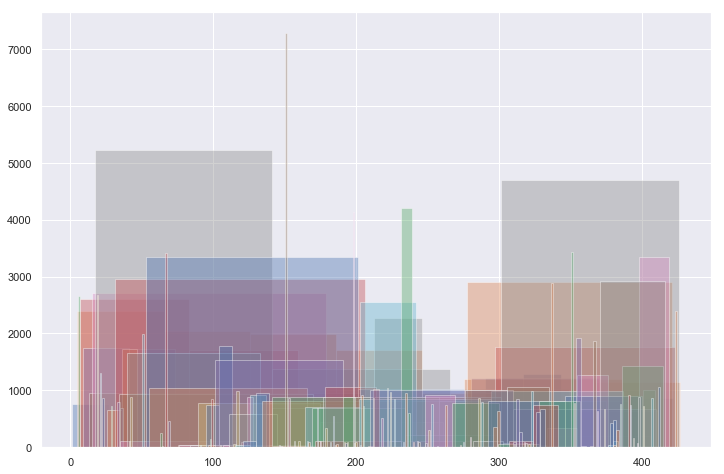

In [573]:
hist_dis2(dep,lista)

In [569]:
lista=dep.keys()

In [562]:
lista=['A PRESIDENTE', 'PRESIDENTE', 'RICARDO BARROS', 'AFONSO MOTTA', 'ALEXANDRE FROTA', 'DARCI DE MATOS', 'FÁBIO TRAD', 'JOSÉ NELTO', 'CLAUDIO CAJADO', 'SANTINI', 'BOSCO COSTA', 'FREI ANASTACIO RIBEIRO', 'MARCON', 'A ALICE PORTUGAL', 'ARNALDO JARDIM', 'ALEXANDRE PADILHA', 'VALMIR ASSUNÇÃO', 'A BENEDITA DA SILVA', 'NEWTON CARDOSO JR', 'CORONEL CHRISÓSTOMO', 'VICENTINHO JÚNIOR', 'EDMILSON RODRIGUES', 'NILTO TATTO', 'ODAIR CUNHA', 'A MARGARIDA SALOMÃO', 'OTONI DE PAULA', 'BALEIA ROSSI', 'HÉLIO COSTA', 'GIOVANI CHERINI', 'VANDERLEI MACRIS', 'DANIEL ALMEIDA', 'MARCELO FREIXO', 'ENRICO MISASI', 'ALIEL MACHADO', 'A JANDIRA FEGHALI', 'MAJOR VITOR HUGO', 'GERVÁSIO MAIA', 'PAULO RAMOS', 'MARCEL VAN HATTEM', 'SUBTENENTE GONZAGA', 'CAPITÃO WAGNER', 'CORONEL TADEU', 'REGINALDO LOPES', 'DOMINGOS SÁVIO', 'FILIPE BARROS', 'CAPITÃO AUGUSTO', 'BOHN GASS', 'OLIVAL MARQUES', 'CARLOS JORDY', 'A PERPÉTUA ALMEIDA', 'PEDRO AUGUSTO BEZERRA', 'FELÍCIO LATERÇA', 'BIRA DO PINDARÉ']

<function matplotlib.pyplot.show(*args, **kw)>

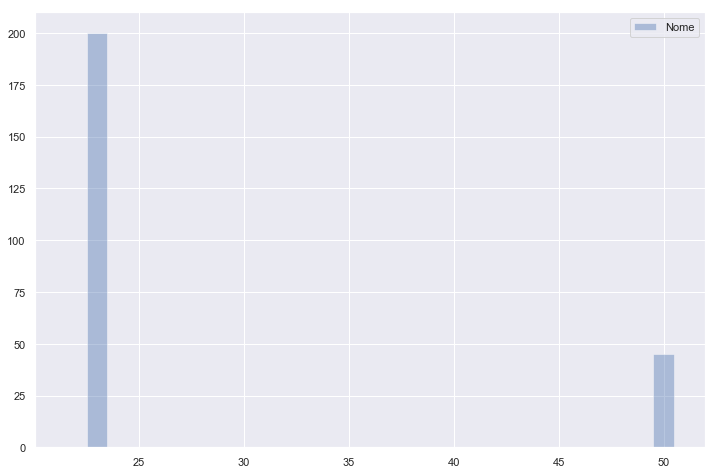

In [520]:
plt.figure(figsize=(12,8))
sns.distplot(list(dict.keys()),hist_kws={'weights':list(dict.values())},bins=bins2-0.5,kde=False,hist=True,label='Nome')

plt.legend()
plt.show

In [506]:
bins2=np.arange(min(dict.keys())-1,max(dict.keys())+2)

In [500]:
dict

{23: 200, 50: 45}

In [507]:
bins2

array([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51])